In [642]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [688]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [713]:
from datetime import datetime
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import utils
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Activation, Input, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
import scipy as sc
import time

In [690]:
datos = pd.read_csv('M:/Users/angui/Desktop/proyectos_personales/Proyectos_Personales/train.csv')

In [691]:
datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [692]:
datos['Name'][0].split(',')[1].split('.')[0].replace(" ", "")

'Mr'

In [693]:
l = []
l2 = []
l3 = []
for i in range(len(datos['Name'])):
    l.append(datos['SibSp'][i] + datos['Parch'][i]+1)
    l2.append(datos['Name'][i].split(',')[1].split('.')[0].replace(" ", ""))
    l3.append(datos['Ticket'][i][0])
datos['Family_Size'] = l
datos['Title'] = l2
datos['Tick'] = l3

datos['Title'] = datos['Title'].replace('Mlle', 'Miss')
datos['Title'] = datos['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
datos.Title.loc[ (datos.Title !=  'Master') & (datos.Title !=  'Dr') &(datos.Title !=  'Mr') & (datos.Title !=  'Miss') 
             & (datos.Title !=  'Mrs')] = 'Others'

M:\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [694]:
guess_Fare = datos.Fare.loc[ (datos.Ticket == '3') & (datos.Pclass == 3) & (datos.Embarked == 'S')].median()
datos.Fare.fillna(guess_Fare , inplace=True)

datos.Embarked = datos.Embarked.fillna('S')
datos.Survived = datos.Survived.astype('float')

In [695]:
datos['Sex'] = datos['Sex'].astype('category')
# convert to category codes
datos['Sex'] = datos['Sex'].cat.codes

In [696]:
datos2 = datos

In [697]:
varcontinuas = ['Title', 'Embarked']
for var in varcontinuas:
    datos = pd.concat([datos, 
                    pd.get_dummies(datos[var], prefix=var)], axis=1)
    del datos[var]

In [698]:
mediana = datos[datos.Age.notna()].Age.median()
datos.Age = datos.Age.fillna(mediana)

In [699]:
continuas = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']
scaler = MinMaxScaler()

for var in continuous:
    datos[var] = datos[var].astype('float64')
    datos[var] = scaler.fit_transform(datos[var].values.reshape(-1, 1))

In [700]:
datos.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Family_Size', 'Tick', 'Title_Dr',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [701]:
datos = datos.drop(datos.columns[[0, 3, 8, 10, 12]],axis = 1)

In [702]:
datos

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Size,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,1,0.271174,0.125,0.000000,0.014151,2,0,0,0,1,0,0,0,0,1
1,1.0,0.0,0,0.472229,0.125,0.000000,0.139136,2,0,0,0,0,1,0,1,0,0
2,1.0,1.0,0,0.321438,0.000,0.000000,0.015469,1,0,0,1,0,0,0,0,0,1
3,1.0,0.0,0,0.434531,0.125,0.000000,0.103644,2,0,0,0,0,1,0,0,0,1
4,0.0,1.0,1,0.434531,0.000,0.000000,0.015713,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,1,0.334004,0.000,0.000000,0.025374,1,0,0,0,0,0,1,0,0,1
887,1.0,0.0,0,0.233476,0.000,0.000000,0.058556,1,0,0,1,0,0,0,0,0,1
888,0.0,1.0,0,0.346569,0.125,0.333333,0.045771,4,0,0,1,0,0,0,0,0,1
889,1.0,0.0,1,0.321438,0.000,0.000000,0.058556,1,0,0,0,1,0,0,1,0,0


In [703]:
print(datos.columns)

for j in range(len(datos.columns)):
    l = []
    print(str(datos.columns[j]))
    
    for i, row in enumerate(datos[datos.columns[j]].isna()):
        if row == True:
            l.append(i)
            #print(i)
    print(len(l))
    print(l)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Family_Size', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Others', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Survived
0
[]
Pclass
0
[]
Sex
0
[]
Age
0
[]
SibSp
0
[]
Parch
0
[]
Fare
0
[]
Family_Size
0
[]
Title_Dr
0
[]
Title_Master
0
[]
Title_Miss
0
[]
Title_Mr
0
[]
Title_Mrs
0
[]
Title_Others
0
[]
Embarked_C
0
[]
Embarked_Q
0
[]
Embarked_S
0
[]


In [704]:
#Cogemos la moda

In [705]:
datos.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.000000,0.000000,1.000000,1.0
Pclass,891.0,0.654321,0.418036,0.0,0.500000,1.000000,1.000000,1.0
Sex,891.0,0.647587,0.477990,0.0,0.000000,1.000000,1.000000,1.0
Age,891.0,0.363679,0.163605,0.0,0.271174,0.346569,0.434531,1.0
SibSp,891.0,0.065376,0.137843,0.0,0.000000,0.000000,0.125000,1.0
Parch,891.0,0.063599,0.134343,0.0,0.000000,0.000000,0.000000,1.0
Fare,891.0,0.062858,0.096995,0.0,0.015440,0.028213,0.060508,1.0
Family_Size,891.0,1.904602,1.613459,1.0,1.000000,1.000000,2.000000,11.0
Title_Dr,891.0,0.007856,0.088337,0.0,0.000000,0.000000,0.000000,1.0
Title_Master,891.0,0.044893,0.207186,0.0,0.000000,0.000000,0.000000,1.0


In [706]:
X_train = datos.drop(columns = ['Survived'])
y_train = datos['Survived']

In [707]:
datos

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Size,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,1,0.271174,0.125,0.000000,0.014151,2,0,0,0,1,0,0,0,0,1
1,1.0,0.0,0,0.472229,0.125,0.000000,0.139136,2,0,0,0,0,1,0,1,0,0
2,1.0,1.0,0,0.321438,0.000,0.000000,0.015469,1,0,0,1,0,0,0,0,0,1
3,1.0,0.0,0,0.434531,0.125,0.000000,0.103644,2,0,0,0,0,1,0,0,0,1
4,0.0,1.0,1,0.434531,0.000,0.000000,0.015713,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,1,0.334004,0.000,0.000000,0.025374,1,0,0,0,0,0,1,0,0,1
887,1.0,0.0,0,0.233476,0.000,0.000000,0.058556,1,0,0,1,0,0,0,0,0,1
888,0.0,1.0,0,0.346569,0.125,0.333333,0.045771,4,0,0,1,0,0,0,0,0,1
889,1.0,0.0,1,0.321438,0.000,0.000000,0.058556,1,0,0,0,1,0,0,1,0,0


In [719]:


model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'sigmoid'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 0.05), metrics = ['binary_accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)

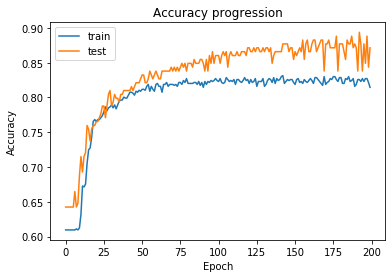

In [720]:
import matplotlib.pyplot as plt
plt.plot(history.history["binary_accuracy"])
plt.plot(history.history["val_binary_accuracy"])
plt.title("Accuracy progression")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="best")
plt.show()

In [710]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']

scaler = StandardScaler()

for var in continuous:
    datos[var] = datos[var].astype('float64')
    datos[var] = scaler.fit_transform(datos[var].values.reshape(-1, 1))

In [435]:
datos['Sex'] = datos['Sex'].astype('category')
# convert to category codes
datos['Sex'] = datos['Sex'].cat.codes

In [436]:
categorical = ['Embarked']
for var in categorical:
    datos = pd.concat([datos, pd.get_dummies(datos[var], prefix=var)], axis=1)
    del datos[var]

KeyError: 'Embarked'

In [440]:
datos2   = datos2.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

KeyError: "['PassengerId' 'Name' 'Ticket' 'Cabin'] not found in axis"

In [457]:
datos2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title,Tick
0,0.0,3,1,22.0,1,0,7.2500,S,2,Mr,A
1,1.0,1,0,38.0,1,0,71.2833,C,2,Mrs,P
2,1.0,3,0,26.0,0,0,7.9250,S,1,Miss,S
3,1.0,1,0,35.0,1,0,53.1000,S,2,Mrs,1
4,0.0,3,1,35.0,0,0,8.0500,S,1,Mr,3
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,1,27.0,0,0,13.0000,S,1,Others,2
887,1.0,1,0,19.0,0,0,30.0000,S,1,Miss,1
888,0.0,3,0,NaN,1,2,23.4500,S,4,Miss,W
889,1.0,1,1,26.0,0,0,30.0000,C,1,Mr,1


In [456]:
X_train = datos2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Tick', 'Title','Family_Size']]
y_train = datos2[['Survived']]

In [533]:
variables_continuas = ['Age', 'Parch', 'Fare', 'Family_Size', 'SibSp']
variables_ordinales = ['Pclass']
variables_categoricas =  ['Title', 'Embarked', 'Tick','Sex']
no_codificadas = []
variable_respuesta_codificada = []
variable_respuesta_sin_codificar = ['Survived']

def codificar_variables(train, test):
    if len(variables_continuas) != 0:
        continuas = variables_continuas
        cs = StandardScaler()
        trainCont = cs.fit_transform(train[continuas])
        testCont = cs.transform(test[continuas])
    
    if len(variables_ordinales) != 0:
        ordinales = variables_ordinales
        oe = OrdinalEncoder()
        oe.fit(train[ordinales])
        trainOrd = oe.transform(train[ordinales])
        testOrd = oe.transform(test[ordinales])
    
    if len(variables_categoricas) != 0:
        discretas = variables_categoricas
        ohe = OneHotEncoder()
        ohe.fit(train[discretas])
    
        trainDisc = ohe.transform(train[discretas])
        testDisc = ohe.transform(test[discretas])
    
    
    trainX = sc.sparse.hstack((trainOrd.sort(axis = 1),trainDisc.sorted_indices(), trainCont.sort(axis= 1)))
    testX = sc.sparse.hstack((testOrd.sort(axis = 1),testDisc.sorted_indices(), testCont.sort(axis = 1)))
    
    
    if len(no_codificadas) != 0:
        trainX = sc.sparse.hstack((trainX, train[no_codificadas].sort_index(axis=1)))
        testX = sc.sparse.hstack((testX, test[no_codificadas].sort_index(axis = 1)))
    
    return (trainX, testX)

def prepare_targets(train, test):
    if len(variable_respuesta_codificada) != 0:
        labeled_col = variable_respuesta_codificada
        le = LabelEncoder()
        le.fit(train[labeled_col].values.ravel())
        trainY = le.transform(train[labeled_col])
        testY = le.transform(test[labeled_col])
    else:
        trainY = np.asarray(train[variable_respuesta_sin_codificar])
        testY = np.asarray(test[variable_respuesta_sin_codificar])
    return trainY, testY

In [534]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(datos2, test_size = 0.2, random_state = 40)

In [535]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title,Tick
661,0.0,3,1,40.0,0,0,7.2250,C,1,Mr,2
393,1.0,1,0,23.0,1,0,113.2750,C,2,Miss,3
266,0.0,3,1,16.0,4,1,39.6875,S,6,Mr,3
144,0.0,2,1,18.0,0,0,11.5000,S,1,Mr,2
446,1.0,2,0,13.0,0,1,19.5000,S,2,Miss,2
...,...,...,...,...,...,...,...,...,...,...,...
440,1.0,2,0,45.0,1,1,26.2500,S,3,Mrs,F
165,1.0,3,1,9.0,0,2,20.5250,S,3,Master,3
7,0.0,3,1,2.0,3,1,21.0750,S,5,Master,3
219,0.0,2,1,30.0,0,0,10.5000,S,1,Mr,W


In [536]:
X_train_enc, X_test_enc = codificar_variables(train, test)

In [537]:
Y_train_enc, Y_test_enc = prepare_targets(train, test)

In [538]:
#print(type(X_train_enc))

In [539]:
#type(Y_train_enc)

In [549]:
model = Sequential()
model.add(Dense(10, input_dim = X_train_enc.shape[1], activation = 'sigmoid'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [550]:
model.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 0.05), metrics = ['binary_accuracy'])

In [551]:
history = model.fit(X_train_enc, Y_train_enc, validation_data = (X_test_enc, Y_test_enc), epochs = 200, batch_size = 32, shuffle = True)


Epoch 1/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6577 - binary_accuracy: 0.6264 - val_loss: 0.6762 - val_binary_accuracy: 0.5754
Epoch 2/200
23/23 [==============================] - 0s 954us/step - loss: 0.6476 - binary_accuracy: 0.6264 - val_loss: 0.6705 - val_binary_accuracy: 0.5754
Epoch 3/200
23/23 [==============================] - 0s 996us/step - loss: 0.6423 - binary_accuracy: 0.6264 - val_loss: 0.6703 - val_binary_accuracy: 0.5754
Epoch 4/200
23/23 [==============================] - 0s 954us/step - loss: 0.6384 - binary_accuracy: 0.6264 - val_loss: 0.6629 - val_binary_accuracy: 0.5754
Epoch 5/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6324 - binary_accuracy: 0.6264 - val_loss: 0.6567 - val_binary_accuracy: 0.5754
Epoch 6/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6273 - binary_accuracy: 0.6264 - val_loss: 0.6482 - val_binary_accuracy: 0.5754
Epoch 7/200
23/23 [==============================] - 0s 996us/st

23/23 [==============================] - 0s 996us/step - loss: 0.4594 - binary_accuracy: 0.7865 - val_loss: 0.4373 - val_binary_accuracy: 0.8101
Epoch 54/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4572 - binary_accuracy: 0.7963 - val_loss: 0.4376 - val_binary_accuracy: 0.8101
Epoch 55/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4588 - binary_accuracy: 0.7879 - val_loss: 0.4364 - val_binary_accuracy: 0.8101
Epoch 56/200
23/23 [==============================] - 0s 996us/step - loss: 0.4555 - binary_accuracy: 0.7907 - val_loss: 0.4362 - val_binary_accuracy: 0.8101
Epoch 57/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4537 - binary_accuracy: 0.7921 - val_loss: 0.4507 - val_binary_accuracy: 0.7709
Epoch 58/200
23/23 [==============================] - 0s 998us/step - loss: 0.4556 - binary_accuracy: 0.7992 - val_loss: 0.4343 - val_binary_accuracy: 0.8101
Epoch 59/200
23/23 [==============================] - 0s 955us/step - l

23/23 [==============================] - 0s 997us/step - loss: 0.4368 - binary_accuracy: 0.8188 - val_loss: 0.4316 - val_binary_accuracy: 0.7877
Epoch 106/200
23/23 [==============================] - 0s 952us/step - loss: 0.4372 - binary_accuracy: 0.8174 - val_loss: 0.4196 - val_binary_accuracy: 0.8101
Epoch 107/200
23/23 [==============================] - 0s 954us/step - loss: 0.4399 - binary_accuracy: 0.8020 - val_loss: 0.4347 - val_binary_accuracy: 0.7877
Epoch 108/200
23/23 [==============================] - 0s 996us/step - loss: 0.4384 - binary_accuracy: 0.8104 - val_loss: 0.4177 - val_binary_accuracy: 0.7933
Epoch 109/200
23/23 [==============================] - 0s 997us/step - loss: 0.4359 - binary_accuracy: 0.8160 - val_loss: 0.4172 - val_binary_accuracy: 0.8101
Epoch 110/200
23/23 [==============================] - 0s 954us/step - loss: 0.4380 - binary_accuracy: 0.8006 - val_loss: 0.4168 - val_binary_accuracy: 0.7933
Epoch 111/200
23/23 [==============================] - 0s 99

Epoch 157/200
23/23 [==============================] - 0s 911us/step - loss: 0.4305 - binary_accuracy: 0.8104 - val_loss: 0.4124 - val_binary_accuracy: 0.8156
Epoch 158/200
23/23 [==============================] - 0s 954us/step - loss: 0.4318 - binary_accuracy: 0.8090 - val_loss: 0.4133 - val_binary_accuracy: 0.8156
Epoch 159/200
23/23 [==============================] - 0s 997us/step - loss: 0.4317 - binary_accuracy: 0.8020 - val_loss: 0.4424 - val_binary_accuracy: 0.7821
Epoch 160/200
23/23 [==============================] - 0s 954us/step - loss: 0.4329 - binary_accuracy: 0.8174 - val_loss: 0.4174 - val_binary_accuracy: 0.7877
Epoch 161/200
23/23 [==============================] - 0s 997us/step - loss: 0.4275 - binary_accuracy: 0.8174 - val_loss: 0.4114 - val_binary_accuracy: 0.8156
Epoch 162/200
23/23 [==============================] - 0s 997us/step - loss: 0.4313 - binary_accuracy: 0.8090 - val_loss: 0.4103 - val_binary_accuracy: 0.8212
Epoch 163/200
23/23 [=========================

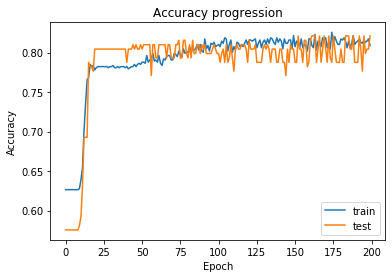

In [553]:
import matplotlib.pyplot as plt
plt.plot(history.history["binary_accuracy"])
plt.plot(history.history["val_binary_accuracy"])
plt.title("Accuracy progression")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="best")
plt.show()

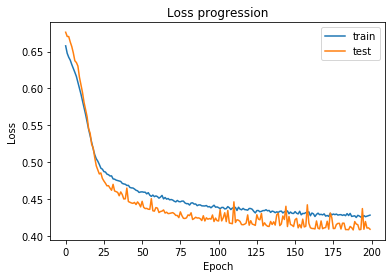

In [554]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss progression")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="best")
plt.show()

In [577]:
import math
from sklearn.metrics import confusion_matrix
output = model.predict(X_test_enc)
predictions = np.round(output)
predictions
conf_matrix = confusion_matrix(Y_test_enc, predictions)
print(conf_matrix)

[[88 15]
 [17 59]]


In [634]:
test.index

Int64Index([246, 588, 472,  71, 654, 418, 220, 283, 733, 550,
            ...
            470, 452, 834, 721, 373, 284, 727, 599, 525, 457],
           dtype='int64', length=179)

In [626]:
output = model.predict(X_test_enc)
l = []
for i in range(len(output)):
    l.append(np.round(output[i][0]))
df['Survived'] = l


In [633]:
Y_test_enc

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [635]:
df2 = pd.DataFrame.sparse.from_spmatrix(X_test_enc)
df3 = pd.DataFrame()
df3['Hip_Survived'] = l
df3['Real_Survived'] = Y_test_enc
df3['PassengerID'] = test.index

In [641]:
df3.sort_values('PassengerID')

,Hip_Survived,Real_Survived,PassengerID
32,0.0,0.0,0
151,0.0,0.0,12
84,1.0,1.0,15
73,0.0,0.0,20
12,0.0,0.0,26
...,...,...,...
59,0.0,0.0,870
22,1.0,1.0,874
124,1.0,1.0,875
76,0.0,0.0,876


In [616]:
a = [2,3]
b = [4,3]
c = [2,3]
np.append(np.append(a,b),c)

array([2, 3, 4, 3, 2, 3])